In [1]:
import numpy as np
import pandas as pd

import json
import csv

import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pytz

In [2]:
filenames = ['ECE219_tweet_data/tweets_#gohawks.txt',
            'ECE219_tweet_data/tweets_#gopatriots.txt',
            'ECE219_tweet_data/tweets_#nfl.txt',
            'ECE219_tweet_data/tweets_#patriots.txt',
            'ECE219_tweet_data/tweets_#sb49.txt',
            'ECE219_tweet_data/tweets_#superbowl.txt']

output_filenames = ['Q1_2#gohawks.lol',
                    'Q1_2#gopatriots.lol',
                   'Q1_2#nfl.lol',
                   'Q1_2#patriots.lol',
                   'Q1_2#sb49.lol',
                   'Q1_2#superbowl.lol']

for i in range(len(filenames)):
    with open(filenames[i], 'r') as reader:
        headers = ['citation_date','author_nick_names','tweets','retweets','followers']
        with open(output_filenames[i], 'w') as writer:
            csv_writer = csv.writer(writer, lineterminator='\n')
            csv_writer.writerow(headers)
            for line in reader:
                data = json.loads(line)
                response = [datetime.datetime.fromtimestamp(data['citation_date']),
                            data['author']['nick'],
                            1, # there is one tweet at a time..
                            data['metrics']['citations']['total'], #retweets
                            data['author']['followers'], #followers
                             ]
                csv_writer.writerow(response)


In [3]:
# # this is where we will only use what we need.

# filename = 'ECE219_tweet_data/tweets_#gohawks.txt'
# output_filename = 'Q1_2#gohawks.lol'

# with open(filename, 'r') as reader:
#     headers = ['citation_date','author_nick_names''tweets','retweets','followers']
#     with open(output_filename, 'w') as writer:
#         csv_writer = csv.writer(writer, lineterminator='\n')
#         csv_writer.writerow(headers)
#         for line in reader:
#             data = json.loads(line)
#             response = [datetime.datetime.fromtimestamp(data['citation_date']),
#                         data['author']['nick'],
#                         1, # there is one tweet at a time..
#                         data['metrics']['citations']['total'], #retweets
#                         data['author']['followers'], #followers
#                          ]
#             csv_writer.writerow(response)
            
# filename = 'ECE219_tweet_data/tweets_#gopatriots.txt'
# output_filename = 'Q1_2#gopatriots.lol'

# with open(filename, 'r') as reader:
#     headers = ['citation_date','tweets','retweets','followers']
#     with open(output_filename, 'w') as writer:
#         csv_writer = csv.writer(writer, lineterminator='\n')
#         csv_writer.writerow(headers)
#         for line in reader:
#             data = json.loads(line)
#             response = [datetime.datetime.fromtimestamp(data['citation_date']),
#                         data['author']['nick'],
#                         1, # there is one tweet at a time..
#                         data['metrics']['citations']['total'], #retweets
#                         data['author']['followers'], #followers
#                          ]
#             csv_writer.writerow(response)

            
# filename = 'ECE219_tweet_data/tweets_#nfl.txt'
# output_filename = 'Q1_2#nfl.lol'

# with open(filename, 'r') as reader:
#     headers = ['citation_date','tweets','retweets','followers']
#     with open(output_filename, 'w') as writer:
#         csv_writer = csv.writer(writer, lineterminator='\n')
#         csv_writer.writerow(headers)
#         for line in reader:
#             data = json.loads(line)
#             response = [datetime.datetime.fromtimestamp(data['citation_date']),
#                         data['author']['nick'],
#                         1, # there is one tweet at a time..
#                         data['metrics']['citations']['total'], #retweets
#                         data['author']['followers'], #followers
#                          ]
#             csv_writer.writerow(response)

            
# filename = 'ECE219_tweet_data/tweets_#patriots.txt'
# output_filename = 'Q1_2#patriots.lol'

# with open(filename, 'r') as reader:
#     headers = ['citation_date','tweets','retweets','followers']
#     with open(output_filename, 'w') as writer:
#         csv_writer = csv.writer(writer, lineterminator='\n')
#         csv_writer.writerow(headers)
#         for line in reader:
#             data = json.loads(line)
#             response = [datetime.datetime.fromtimestamp(data['citation_date']),
#                         data['author']['nick'],
#                         1, # there is one tweet at a time..
#                         data['metrics']['citations']['total'], #retweets
#                         data['author']['followers'], #followers
#                          ]
#             csv_writer.writerow(response)
      
    
# filename = 'ECE219_tweet_data/tweets_#sb49.txt'
# output_filename = 'Q1_2#sb49.lol'

# with open(filename, 'r') as reader:
#     headers = ['citation_date','tweets','retweets','followers']
#     with open(output_filename, 'w') as writer:
#         csv_writer = csv.writer(writer, lineterminator='\n')
#         csv_writer.writerow(headers)
#         for line in reader:
#             data = json.loads(line)
#             response = [datetime.datetime.fromtimestamp(data['citation_date']),
#                         data['author']['nick'],
#                         1, # there is one tweet at a time..
#                         data['metrics']['citations']['total'], #retweets
#                         data['author']['followers'], #followers
#                          ]
#             csv_writer.writerow(response)
            
# filename = 'ECE219_tweet_data/tweets_#superbowl.txt'
# output_filename = 'Q1_2#superbowl.lol'

# with open(filename, 'r') as reader:
#     headers = ['citation_date','tweets','retweets','followers']
#     with open(output_filename, 'w') as writer:
#         csv_writer = csv.writer(writer, lineterminator='\n')
#         csv_writer.writerow(headers)
#         for line in reader:
#             data = json.loads(line)
#             response = [datetime.datetime.fromtimestamp(data['citation_date']),
                        
#                         1, # there is one tweet at a time..
#                         data['metrics']['citations']['total'], #retweets
#                         data['author']['followers'], #followers
#                          ]
#             csv_writer.writerow(response)

In [4]:
# QUESTION 1: Report the following statistics for each hashtag:
#  Average number of tweets per hour
#  Average number of followers of users posting the tweets per tweet (to make it simple, we
# average over the number of tweets; if a users posted twice, we count the user and the user's
# followers twice as well)
#  Average number of retweets per tweet

In [5]:
gohawks = pd.read_csv('Q1_2#gohawks.lol',delimiter=',', parse_dates=['citation_date'])
gopatriots = pd.read_csv('Q1_2#gopatriots.lol',delimiter=',', parse_dates=['citation_date'])
nfl = pd.read_csv('Q1_2#nfl.lol',delimiter=',', parse_dates=['citation_date'])
patriots = pd.read_csv('Q1_2#patriots.lol',delimiter=',', parse_dates=['citation_date'])
sb49 = pd.read_csv('Q1_2#sb49.lol',delimiter=',', parse_dates=['citation_date'])
superbowl = pd.read_csv('Q1_2#superbowl.lol',delimiter=',', parse_dates=['citation_date'])

In [6]:
full_df = pd.concat([gohawks, gopatriots, nfl, patriots, sb49, superbowl])

In [7]:
def get_basic_statistics(dataframe):
    max = dataframe.max()
    min = dataframe.min()
    avg_tweets_per_hour = dataframe['tweets'].sum() / ((max['citation_date'] - min['citation_date']).total_seconds() / 60 / 60)
    print('Average tweets per hour:',avg_tweets_per_hour)
    
    avg_followers_posting_tweets = dataframe['followers'].sum() / dataframe['tweets'].sum()
    print('Average number of users posting tweets per tweet:', avg_followers_posting_tweets)
    
    avg_retweet_per_tweet = dataframe['retweets'].sum() / dataframe['tweets'].sum()
    print('Average number of retweet per tweet:', avg_retweet_per_tweet)

In [8]:
# go hawks
print('GoHawks')
get_basic_statistics(gohawks)

GoHawks
Average tweets per hour: 292.4878506217368
Average number of users posting tweets per tweet: 2217.9237355281984
Average number of retweet per tweet: 2.0132093991319877


In [9]:
#go patriots
print('GoPatriots')
get_basic_statistics(gopatriots)

GoPatriots
Average tweets per hour: 40.95469800606194
Average number of users posting tweets per tweet: 1427.2526051635405
Average number of retweet per tweet: 1.4081919101697078


In [10]:
print('NFL')
get_basic_statistics(nfl)

NFL
Average tweets per hour: 397.0213901819841
Average number of users posting tweets per tweet: 4662.37544523693
Average number of retweet per tweet: 1.5344602655543254


In [11]:
print('Patriots')
get_basic_statistics(patriots)

Patriots
Average tweets per hour: 750.89426460689
Average number of users posting tweets per tweet: 3280.4635616550277
Average number of retweet per tweet: 1.7852871288476946


In [12]:
print('Sb49')
get_basic_statistics(sb49)

Sb49
Average tweets per hour: 1276.857059868047
Average number of users posting tweets per tweet: 10374.160292019487
Average number of retweet per tweet: 2.52713444111402


In [13]:
print('Superbowl')
get_basic_statistics(superbowl)

Superbowl
Average tweets per hour: 2072.1184017040796
Average number of users posting tweets per tweet: 8814.96799424623
Average number of retweet per tweet: 2.3911895819207736


In [14]:
# QUESTION 2: Plot "number of tweets in hour" over time for #SuperBowl and #NFL (a histogram
# with 1-hour bins). The tweets are stored in separate files for different hashtags and files are named
# as tweet [#hashtag].txt.

In [15]:
max = nfl.max()
min = nfl.min()

In [16]:
nfl['time_hour'] = nfl.citation_date.apply(lambda x: round((x - min['citation_date']).total_seconds()/60/60))

In [17]:
superbowl['time_hour'] = superbowl.citation_date.apply(lambda x: round((x - min['citation_date']).total_seconds()/60/60))

In [18]:
nfl.head()

,citation_date,author_nick_names,tweets,retweets,followers,time_hour
0,2015-01-17 09:59:06,ibrake4flowers,1,4,41.0,82
1,2015-01-14 10:08:26,tmswithmro,1,2,361.0,10
2,2015-01-17 10:17:43,rainbowkirk,1,2,6.0,82
3,2015-01-15 19:58:05,gary4freedom,1,2,1364.0,44
4,2015-01-14 09:44:31,eddieedmundo,1,14,580.0,10


In [19]:
superbowl.head()

,citation_date,author_nick_names,tweets,retweets,followers,time_hour
0,2015-01-16 20:21:37,beccadelgado67,1,2,22.0,68
1,2015-01-16 20:06:19,beccadelgado67,1,15,22.0,68
2,2015-01-14 12:22:37,waltskelliepic,1,2,858.0,12
3,2015-01-14 10:48:18,eventmarketer,1,2,14335.0,11
4,2015-01-15 02:00:31,cqr111,1,7,1143.0,26


In [20]:
nfl_time_hour = nfl.groupby('time_hour').sum()

In [21]:
x = list(nfl_time_hour.index)
y = list(nfl_time_hour.tweets)

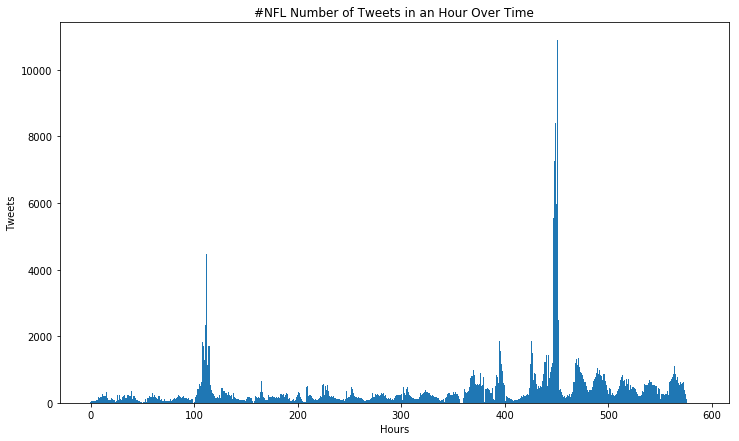

In [22]:
plt.figure(figsize=(12,7))
plt.bar(x, y, width=x[1]-x[0])
plt.xlabel('Hours')
plt.ylabel('Tweets')
plt.title('#NFL Number of Tweets in an Hour Over Time')
plt.show()

In [23]:
superbowl_time_hour = superbowl.groupby('time_hour').sum()

In [24]:
x = list(superbowl_time_hour.index)
y = list(superbowl_time_hour.tweets)

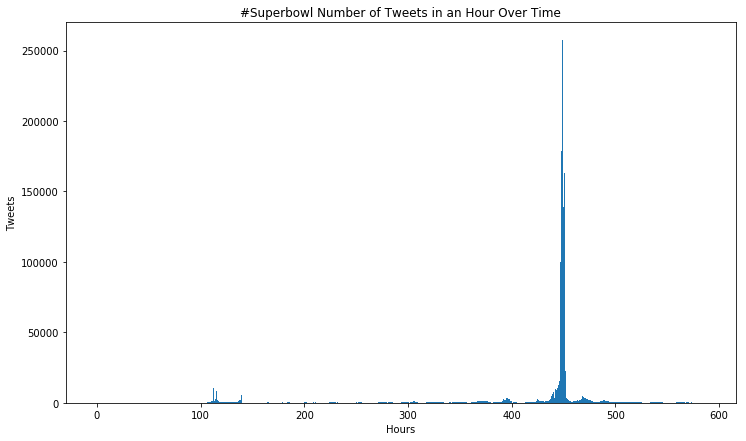

In [25]:
plt.figure(figsize=(12,7))
plt.bar(x, y, width=x[1]-x[0])
plt.xlabel('Hours')
plt.ylabel('Tweets')
plt.title('#Superbowl Number of Tweets in an Hour Over Time')
plt.show()

In [26]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
# QUESTION 6: We define three time periods and their corresponding window length as follows:
# 1. Before Feb. 1, 8:00 a.m.: 1-hour window
# 2. Between Feb. 1, 8:00 a.m. and 8:00 p.m.: 5-minute window
# 3. After Feb. 1, 8:00 p.m.: 1-hour window
# For each hashtag, train 3 regression models, one for each of these time periods (the times are all in
# PST). Report the MSE and R-squared score for each case.

In [127]:
def train_linear_regression(df, train_col):
    model = sm.OLS(list(range(len(df))), df[train_col].tolist())
    return model.fit()

def get_mse(results):
    print('MSE Score: ' + str(results.mse_total))
    return

def get_r_squared(results):
    print('R-squared Score: ' + str(results.rsquared))
    return

In [136]:
def split_time_periods(df, name):
    pre_active = df[df['citation_date'] < '2015-02-01 08:00:00']
    pre_active['time_hour'] = pre_active.citation_date.apply(lambda x: round((x - min['citation_date']).total_seconds()/60/60))
    pre_active = pre_active.groupby('time_hour').sum()
    
    active_before = df['citation_date'] >= '2015-02-01 08:00:00' 
    active_after = df['citation_date'] <= '2015-02-01 20:00:00'
    active = df[active_before & active_after]
    active['time_five_min'] = active.citation_date.apply(lambda x: round((x - min['citation_date']).total_seconds()/60/12))
    active = active.groupby('time_five_min').sum()

    post_active = df[df['citation_date'] > '2015-02-01 21:00:00']
    post_active['time_hour'] = post_active.citation_date.apply(lambda x: round((x - min['citation_date']).total_seconds()/60/60))
    post_active = post_active.groupby('time_hour').sum()
    
    print('====================== ' + name + ' =======================')
    
    print('====== Pre-active Time ======')
    pre_results = train_linear_regression(pre_active, 'tweets')
    get_mse(pre_results);
    get_r_squared(pre_results);
    
    print('====== Active Time ======')
    results = train_linear_regression(active, 'tweets')
    get_mse(results);
    get_r_squared(results);
    
    print('====== Post-active Time ======')
    post_results = train_linear_regression(post_active, 'tweets')
    get_mse(post_results);
    get_r_squared(post_results);

    return pre_active, active, post_active

In [187]:
gohawks_pre, gohawks_active, gohawks_post = split_time_periods(gohawks, '#gohawks')
gopatriots_pre, gopatriots_active, gopatriots_post = split_time_periods(gopatriots, '#gopatriots')
nfl_pre, nfl_active, nfl_post = split_time_periods(nfl, '#nfl')
patriots_pre, patriots_active, patriots_post = split_time_periods(patriots, '#patriots')
sb49_pre, sb49_active, sb49_post = split_time_periods(sb49, '#sb49')
superbowl_pre, superbowl_active, superbowl_post = split_time_periods(superbowl, '#superbowl')

/Users/jennifermacdonald/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jennifermacdonald/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/jennifermacdonald/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

====================== #gohawks =======================
====== Pre-active Time ======
MSE Score: 64313.5
R-squared Score: 0.0259251663511898
====== Active Time ======
MSE Score: 1210.0
R-squared Score: 0.7193640723575246
====== Post-active Time ======
MSE Score: 4275.166666666667
R-squared Score: 0.003289091601519911
====================== #gopatriots =======================
====== Pre-active Time ======
MSE Score: 49216.0
R-squared Score: 0.016386772061327548
====== Active Time ======
MSE Score: 1170.1666666666667
R-squared Score: 0.6226155254055337
====== Post-active Time ======
MSE Score: 623.5
R-squared Score: 0.030469716410849057
====================== #nfl =======================
====== Pre-active Time ======
MSE Score: 64606.666666666664
R-squared Score: 0.365534290230184
====== Active Time ======
MSE Score: 1210.0
R-squared Score: 0.7580407640767445
====== Post-active Time ======
MSE Score: 5655.0
R-squared Score: 0.48814443978738453
====================== #patriots ===========

In [180]:
# QUESTION 7: Also, aggregate the data of all hashtags, and train 3 models (for the intervals
# mentioned above) to predict the number of tweets in the next hour on the aggregated data.
# Perform the same evaluations on your combined model and compare with models you trained for
# individual hashtags.

In [224]:
agg_pre = pd.concat([gohawks_pre, gopatriots_pre, nfl_pre, patriots_pre, sb49_pre, superbowl_pre], axis=1).fillna(0)
agg_pre = agg_pre.groupby(lambda x:x, axis=1).sum()

agg_active = pd.concat([gohawks_active, gopatriots_active, nfl_active, patriots_active, sb49_active, superbowl_active], axis=1).fillna(0)
agg_active = agg_active.groupby(lambda x:x, axis=1).sum()

agg_post = pd.concat([gohawks_post, gopatriots_post, nfl_post, patriots_post, sb49_post, superbowl_post], axis=1).fillna(0)
agg_post = agg_post.groupby(lambda x:x, axis=1).sum()

In [232]:
def pred_tweets(df):
    model = sm.OLS(df['tweets'].tolist(), list(df.index.tolist()))
    results = model.fit()
    ypred = results.predict((df.index.tolist()[-1])+1)
    return ypred

In [233]:
print("Predicted the number of tweets in the next hour for Pre-active Time: ", pred_tweets(agg_pre))
print("\nPredicted the number of tweets in the next hour for Active Time: ", pred_tweets(agg_active))
print("\nPredicted the number of tweets in the next hour for Post-active Time: ", pred_tweets(agg_post))

Predicted the number of tweets in the next hour for Pre-active Time:  [2282.27451759]

Predicted the number of tweets in the next hour for Active Time:  [32880.56872534]

Predicted the number of tweets in the next hour for Post-active Time:  [1832.50717649]
